In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from IPython.display import display

# Visualisation

In [2]:
def visualisation(dataset, save = False):
    df = pd.read_csv(f'../Data/grouped_dataset_{dataset}.csv', keep_default_na=False)
    
    text_structure = ['reference', 'external_link', 'internal_link', 'table', 'formula', 'images', 'section', 'subsection', 'subsubsection', 'paragraph', 'sentence']
    
    display(df.shape[0])
    display(df[text_structure].describe().transpose())
    
#     text_structure.remove('formula')
    boxplot(df, text_structure, save)
#     violinplot(df, text_structure)

In [3]:
def boxplot(df, text_structure, save):
    """
    boxplots for all text structure
    
    df: dataframe of articles
    text_structure: name of text structure columns
    """

    fig, axs = plt.subplots(4, 3, figsize=(15, 20))
    axs = axs.flatten()

    for index, feature in enumerate(text_structure):
        sns.boxplot(x='2_classes', y=feature, data=df, ax=axs[index], whis=3, dodge=True) #showfliers=False
        axs[index].set_title(f'Boxplot for {feature} By Quality', fontdict={"fontsize":16}, pad=10)
        axs[index].set_xlabel('Quality', fontsize=16)
        axs[index].set_ylabel(f'{feature}', fontsize=16)
        axs[index].tick_params(axis='both', which='major', labelsize=12)
        
#         # Calculate statistics for the current feature and add to the legend
#         stats = df.groupby('2_classes')[feature].describe()
#         min_val = stats['min']
#         q1_val = stats['25%']
#         median_val = stats['50%']
#         q3_val = stats['75%']
#         max_val = stats['max']

#         # Add custom legend
#         for i, class_name in enumerate(min_val.index):
#             axs[index].plot([], [], ' ', label=f"{class_name} - min: {min_val[class_name]:.2f}, Q1: {q1_val[class_name]:.2f}, median: {median_val[class_name]:.2f}, Q3: {q3_val[class_name]:.2f}, max: {max_val[class_name]:.2f}")

#         axs[index].legend(loc='upper right', fontsize=10)

    for ax in axs[len(text_structure):]:
        fig.delaxes(ax)

    plt.tight_layout(pad=3.0)
    
    if save and df.shape[0] == 15998:
        plt.savefig(f"../Report/Image/structure_Boxplot", dpi=300, bbox_inches='tight', transparent=True)
    else:
        plt.savefig(f"../Report/appendix/structure_Boxplot", dpi=300, bbox_inches='tight', transparent=True)
    
    plt.show()

In [4]:
def violinplot(df, text_structure):
    """
    violin plots for all text structure
    
    df: dataframe of articles
    text_structure: name of text structure columns
    """
    
    fig, axs = plt.subplots(4, 3, figsize=(15, 20))
    axs = axs.flatten()

    for index, feature in enumerate(text_structure):
        sns.violinplot(x='2_classes', y=feature, data=df, ax=axs[index])
        axs[index].set_title(f'Violin Plot for {feature} By Quality', fontdict={"fontsize":14}, pad=10)
        axs[index].set_xlabel('Quality', fontsize=16)
        axs[index].set_ylabel(f'{feature}', fontsize=16)
        axs[index].tick_params(axis='both', which='major', labelsize=12)

    fig.delaxes(axs[len(text_structure)])

    fig.tight_layout(pad=5.0)
    plt.show()

# Imbalance Class

15403

,count,mean,std,min,25%,50%,75%,max
reference,15403.0,64.560865,81.661324,0.0,12.0,34.0,84.0,841.0
external_link,15403.0,72.984743,109.268098,0.0,12.0,33.0,84.0,1468.0
internal_link,15403.0,245.597741,243.645706,4.0,82.5,168.0,328.0,2784.0
table,15403.0,1.041940,2.671940,0.0,0.0,0.0,1.0,67.0
formula,15403.0,4.039278,28.636929,0.0,0.0,0.0,0.0,1024.0
images,15403.0,7.376745,14.497072,0.0,1.0,3.0,9.0,855.0
section,15403.0,9.202428,3.856476,0.0,7.0,9.0,12.0,81.0
subsection,15403.0,8.693112,9.058039,0.0,1.0,6.0,13.0,100.0
subsubsection,15403.0,1.848731,4.330832,0.0,0.0,0.0,2.0,61.0
paragraph,15403.0,48.001948,42.100903,1.0,18.0,36.0,67.0,774.0


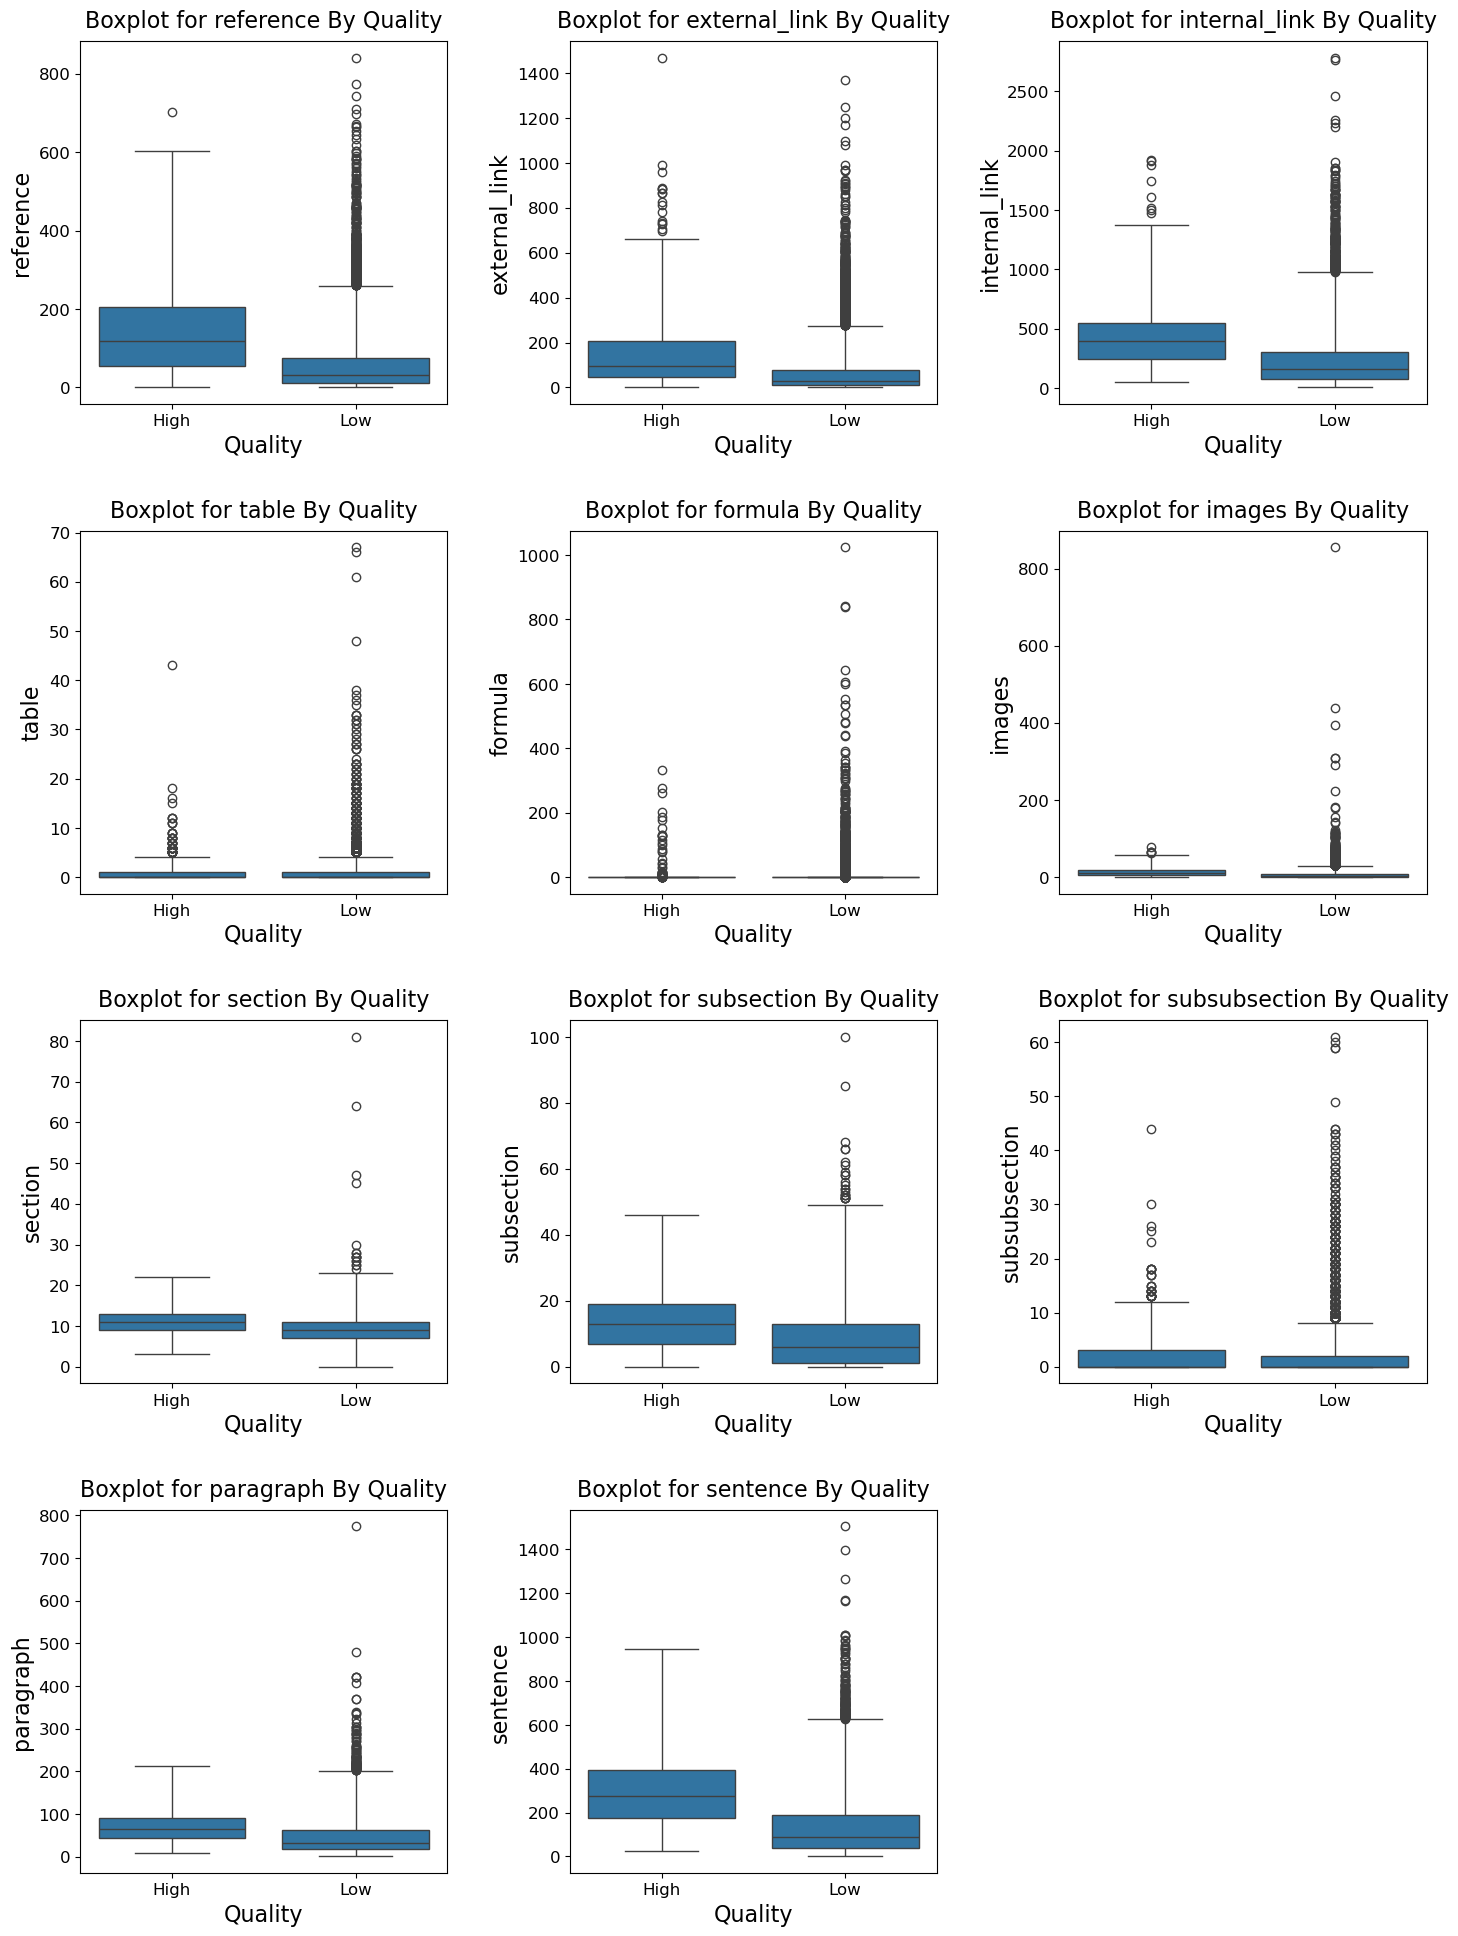

In [5]:
visualisation("(Imbalance)")

# Balance Class

15998

,count,mean,std,min,25%,50%,75%,max
reference,15998.0,76.671646,103.847033,0.0,2.0,37.0,108.0,963.0
external_link,15998.0,99.271534,155.751209,0.0,4.0,33.0,119.0,1360.0
internal_link,15998.0,271.166708,319.754694,1.0,45.0,163.0,365.0,2635.0
table,15998.0,1.092449,2.473871,0.0,0.0,0.0,1.0,45.0
formula,15998.0,0.226528,5.984911,0.0,0.0,0.0,0.0,427.0
images,15998.0,8.012502,12.644878,0.0,0.0,3.0,10.0,333.0
section,15998.0,7.507626,4.812445,0.0,4.0,7.0,11.0,25.0
subsection,15998.0,8.059507,9.837199,0.0,0.0,4.0,12.0,68.0
subsubsection,15998.0,1.480935,3.880181,0.0,0.0,0.0,0.0,52.0
paragraph,15998.0,53.355732,55.745470,1.0,13.0,35.0,76.0,513.0


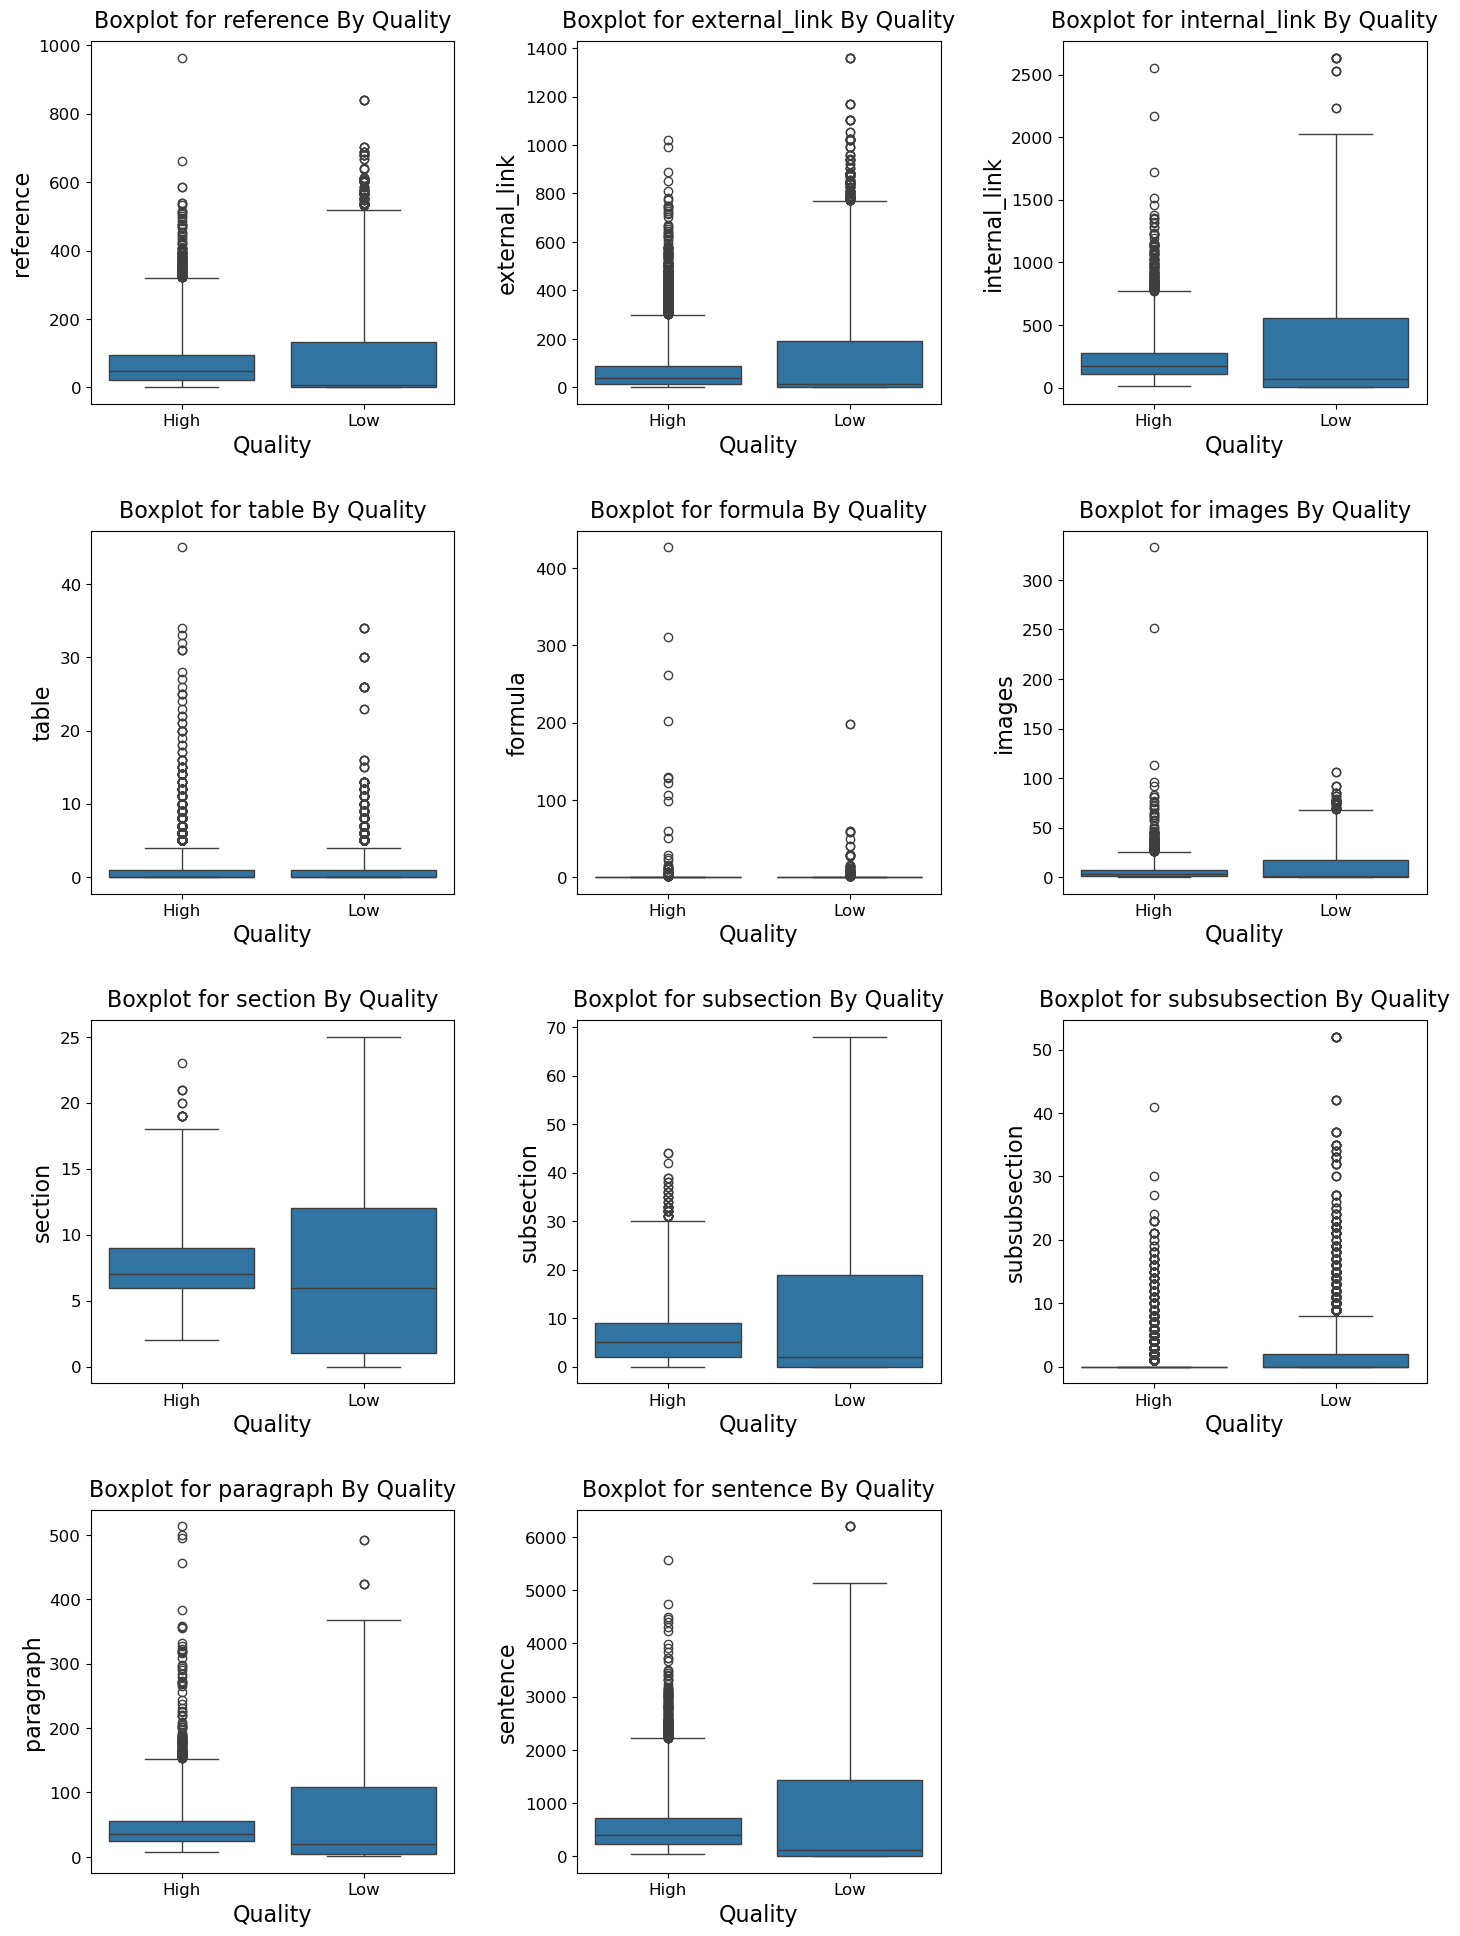

In [6]:
visualisation("(Balance)", save = True)